# Load the necessary modules and dataset

In [98]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset into pandas dataframe
dataframe = pd.read_csv('train.csv')

# Check the dimensions of the dataset

In [3]:
# Check shape of dataset
dataframe.shape

(67760, 12)

# Peek into the dataset

In [4]:
# Check some rows of dataset
dataframe.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0


# Check the data types of various columns in dataset

In [5]:
# Check data types of various columns
dataframe.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                    float64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                float64
Product_Category_1            float64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

# Descriptive Stats of various numerical columns

In [6]:
# Check descriptive statistics of datset
dataframe.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,6.776000e+04,67759.000000,67759.000000,67759.000000,46523.000000,20613.000000,67759.000000
mean,1.002666e+06,8.150519,0.403651,5.299075,9.874686,12.709504,9295.979899
std,4.172374e+03,6.534518,0.490633,3.731052,5.076390,4.109106,4962.435754
min,1.000000e+01,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001301e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5865.000000
50%,1.002643e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8052.000000
75%,1.003902e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12044.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


# Check how many values are null in dataset

In [7]:
# check null values in dataset
dataframe.isnull().sum()

User_ID                           0
Product_ID                        1
Gender                            1
Age                               1
Occupation                        1
City_Category                     1
Stay_In_Current_City_Years        1
Marital_Status                    1
Product_Category_1                1
Product_Category_2            21237
Product_Category_3            47147
Purchase                          1
dtype: int64

# Check for uniques values in dataset

In [8]:
# Checking for uniques values in columns
dataframe.User_ID.unique()

array([1000001, 1000002, 1000003, ..., 1004365, 1004372,      10])

In [9]:
dataframe.Product_ID.unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00277042',
       'P00077142', nan], dtype=object)

In [10]:
dataframe.Gender.unique()

array(['F', 'M', nan], dtype=object)

In [11]:
dataframe.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25', nan],
      dtype=object)

In [12]:
dataframe.Occupation.unique()

array([10., 16., 15.,  7., 20.,  9.,  1., 12., 17.,  0.,  3.,  4., 11.,
        8., 19.,  2., 18.,  5., 14., 13.,  6., nan])

In [13]:
dataframe.City_Category.unique()

array(['A', 'C', 'B', nan], dtype=object)

In [14]:
dataframe.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [15]:
dataframe.Marital_Status.unique()

array([ 0.,  1., nan])

In [16]:
dataframe.Product_Category_1.unique()

array([ 3.,  1., 12.,  8.,  5.,  4.,  2.,  6., 14., 11., 13., 15.,  7.,
       16., 18., 10., 17.,  9., nan])

In [17]:
dataframe.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [18]:
dataframe.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [19]:
dataframe.Purchase.unique()

array([ 8370., 15200.,  1422., ...,  8349.,  9645.,    nan])

# Exploratory data analysis

In [20]:
# Peek into dataframe using head() function
dataframe.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


# Get information about dataset

In [21]:
# Get information about the dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67760 entries, 0 to 67759
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     67760 non-null  int64  
 1   Product_ID                  67759 non-null  object 
 2   Gender                      67759 non-null  object 
 3   Age                         67759 non-null  object 
 4   Occupation                  67759 non-null  float64
 5   City_Category               67759 non-null  object 
 6   Stay_In_Current_City_Years  67759 non-null  object 
 7   Marital_Status              67759 non-null  float64
 8   Product_Category_1          67759 non-null  float64
 9   Product_Category_2          46523 non-null  float64
 10  Product_Category_3          20613 non-null  float64
 11  Purchase                    67759 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 6.2+ MB


# Check for unique items present in dataset

In [22]:
# check unique items in dataset
dataframe.nunique()

User_ID                        5615
Product_ID                     3187
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      12715
dtype: int64

#Check for nulls present in dataset

In [23]:
# Check null values in columns
dataframe.isnull().sum()

User_ID                           0
Product_ID                        1
Gender                            1
Age                               1
Occupation                        1
City_Category                     1
Stay_In_Current_City_Years        1
Marital_Status                    1
Product_Category_1                1
Product_Category_2            21237
Product_Category_3            47147
Purchase                          1
dtype: int64

# Check correlation between columns

In [24]:
# Check correlation between columns of dataset
dataframe.corr()

<ipython-input-24-f620653345dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.017392,0.005266,0.002353,0.004604,-0.012461,0.006300
Occupation,-0.017392,1.000000,0.024430,-0.003487,0.003285,0.010744,0.014047
Marital_Status,0.005266,0.024430,1.000000,0.015149,0.018456,0.016987,0.000806
Product_Category_1,0.002353,-0.003487,0.015149,1.000000,0.540086,0.229940,-0.320203
Product_Category_2,0.004604,0.003285,0.018456,0.540086,1.000000,0.546629,-0.209370
Product_Category_3,-0.012461,0.010744,0.016987,0.229940,0.546629,1.000000,-0.026484
Purchase,0.006300,0.014047,0.000806,-0.320203,-0.209370,-0.026484,1.000000


# Interpolate null values in dataset

In [25]:
# interpolating values in forwared direction in columns that are missing values (NaN)
dataframe = dataframe.interpolate(method ='linear', limit_direction ='forward')

In [26]:
# Check if null values are replaced
dataframe.isnull().sum()

User_ID                       0
Product_ID                    1
Gender                        1
Age                           1
Occupation                    0
City_Category                 1
Stay_In_Current_City_Years    1
Marital_Status                0
Product_Category_1            0
Product_Category_2            1
Product_Category_3            1
Purchase                      0
dtype: int64

# Drop remaining null values

In [27]:
dataframe.dropna(inplace=True)

In [28]:
# Check if null values are replaced
dataframe.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

# Outlier Detection

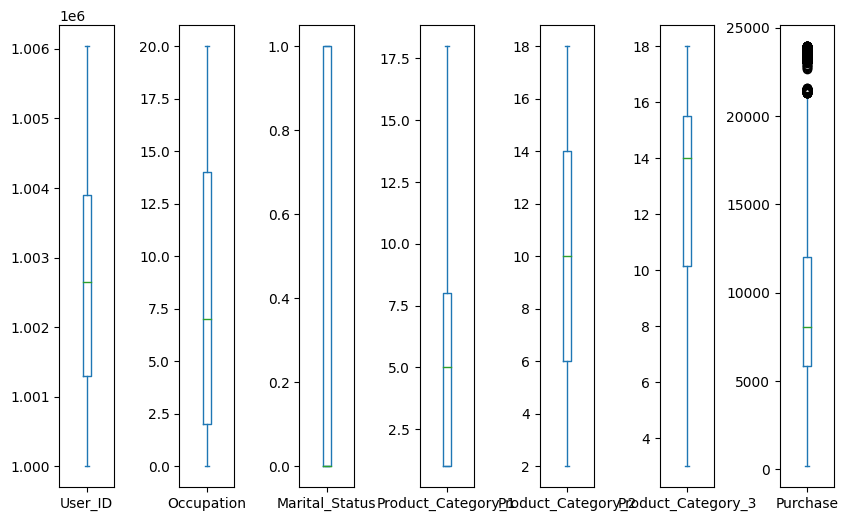

In [29]:
# Detect outlier
dataframe.plot(kind='box',subplots=True,sharey=False,figsize=(10, 6))
plt.subplots_adjust(wspace=1.2)
plt.show()

# Gender wise analysis

<Axes: xlabel='Gender', ylabel='count'>

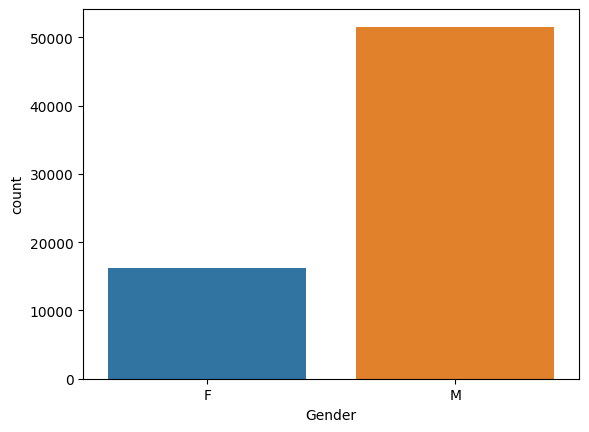

In [30]:
# Gender wise Analysis
sns.countplot(dataframe,x='Gender')


# Marital Status Analysis

<Axes: xlabel='Marital_Status', ylabel='count'>

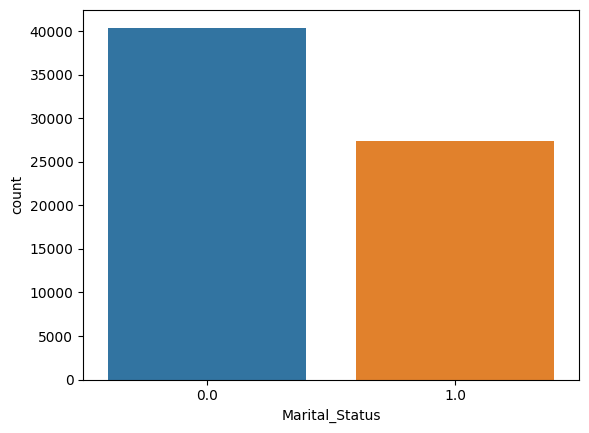

In [31]:
# Maritial Status Analysis
sns.countplot(dataframe,x='Marital_Status')

#Occupation wise Analysis

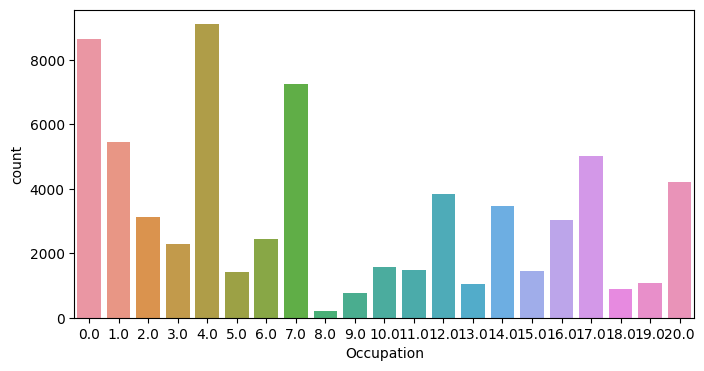

In [32]:
# Occupation Status Analysis
plt.figure(figsize=(8,4))
ax = sns.countplot(dataframe,x='Occupation')

# Graph Purchase vs Occupation

<Axes: xlabel='Occupation', ylabel='Purchase'>

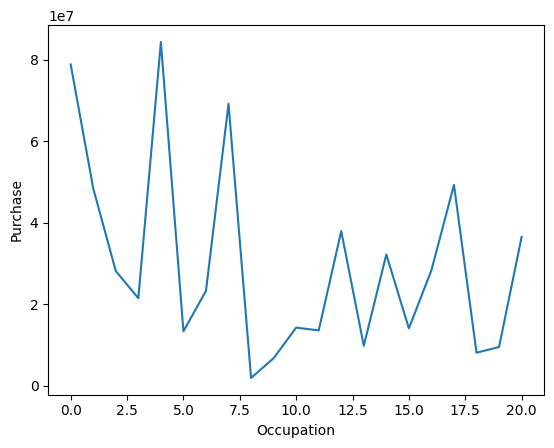

In [33]:
# Analysis of occupation vs purchase
dataframe.groupby('Occupation')['Purchase'].sum().plot(ylabel='Purchase')


# Graph Purchase vs City Category

<Axes: xlabel='City_Category', ylabel='Purchase'>

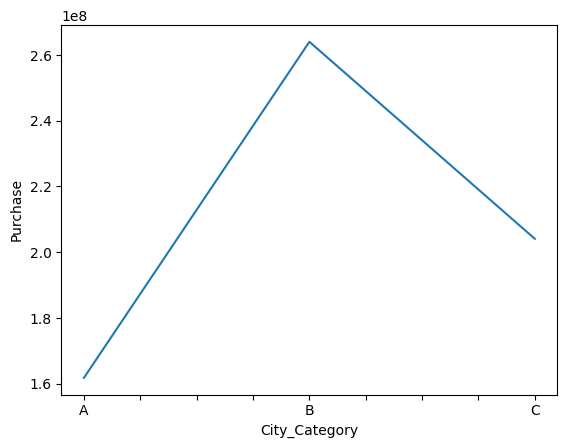

In [34]:
# Analysis of purchase by city
dataframe.groupby('City_Category')['Purchase'].sum().plot(ylabel='Purchase',kind='line')

# Graph Purchase vs Age

<Axes: xlabel='Age', ylabel='Purchase'>

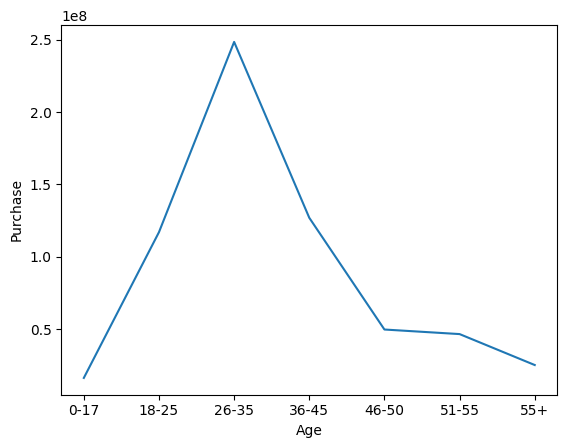

In [35]:
# Analysis of purchase by age group
dataframe.groupby('Age')['Purchase'].sum().plot(ylabel='Purchase',kind='line')

In [36]:
dataframe.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

# Label Encoding to convert categorical variables to Numeric variables

In [38]:
# Convert M and F to numeric variables

label_encoder = preprocessing.LabelEncoder()
dataframe['Gender']= label_encoder.fit_transform(dataframe['Gender'])

In [39]:
# Check if converted to numeric
dataframe['Gender'].unique()

array([0, 1])

In [40]:
# Convert range from Age to numerics

dataframe['Age']= label_encoder.fit_transform(dataframe['Age'])

In [41]:
# Check if converted to numeric
dataframe['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

# Visualizations - Purchase vs Age

<Axes: xlabel='Age', ylabel='Purchase'>

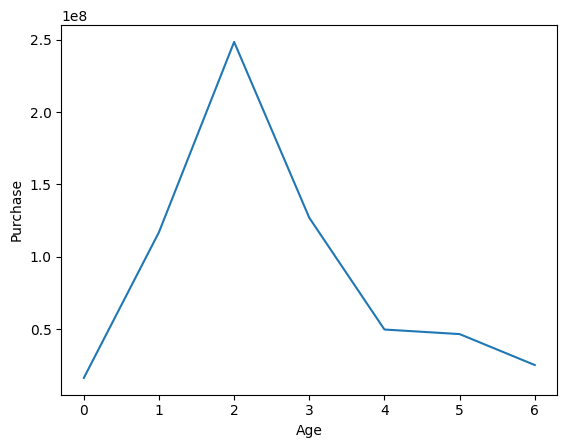

In [42]:
# Visualization purchase vs age
dataframe.groupby('Age')['Purchase'].sum().plot(ylabel='Purchase')

# Visualizations - Purchase vs Occupation

<Axes: xlabel='Occupation', ylabel='Purchase'>

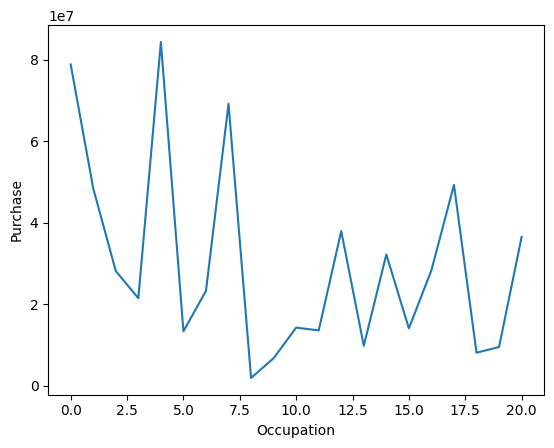

In [43]:
# Visualization Occupation vs Purchase
dataframe.groupby('Occupation')['Purchase'].sum().plot(ylabel='Purchase')

# Visualizations - Purchase vs Category_1

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

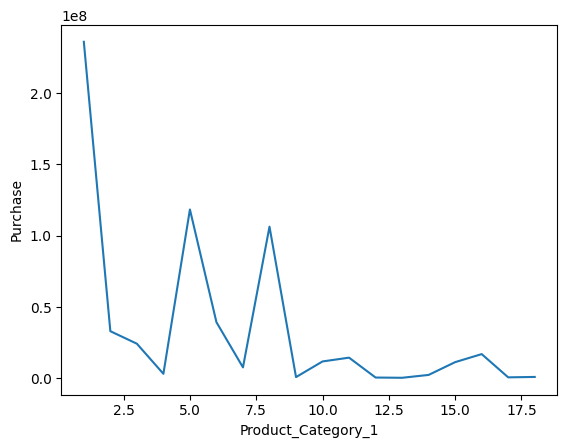

In [44]:
# Visualization Product_category_1 vs Purchase
dataframe.groupby('Product_Category_1')['Purchase'].sum().plot(ylabel='Purchase')

# Visualizations - Purchase vs Category_2

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

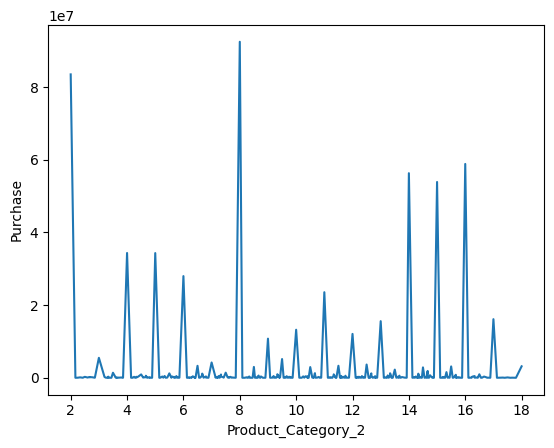

In [45]:
# Visualization Product_category_2 vs Purchase
dataframe.groupby('Product_Category_2')['Purchase'].sum().plot(ylabel='Purchase')

# Visualizations - Purchase vs Category_3

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

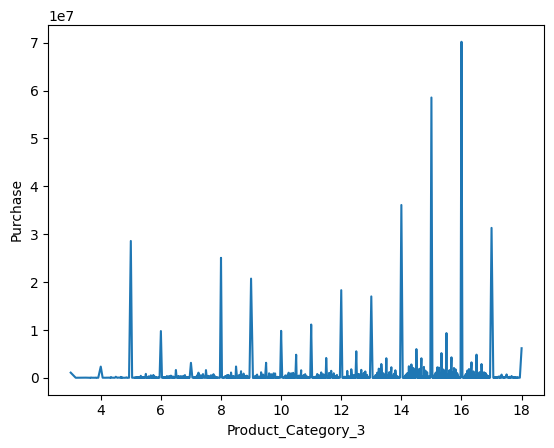

In [46]:
# Visualization Product_category_3 vs Purchase
dataframe.groupby('Product_Category_3')['Purchase'].sum().plot(ylabel='Purchase')

In [96]:
# Convert numerical to categorical value
dataframe['City_Category'] = label_encoder.fit_transform(dataframe['City_Category'])

# Create Pair plots for dataset

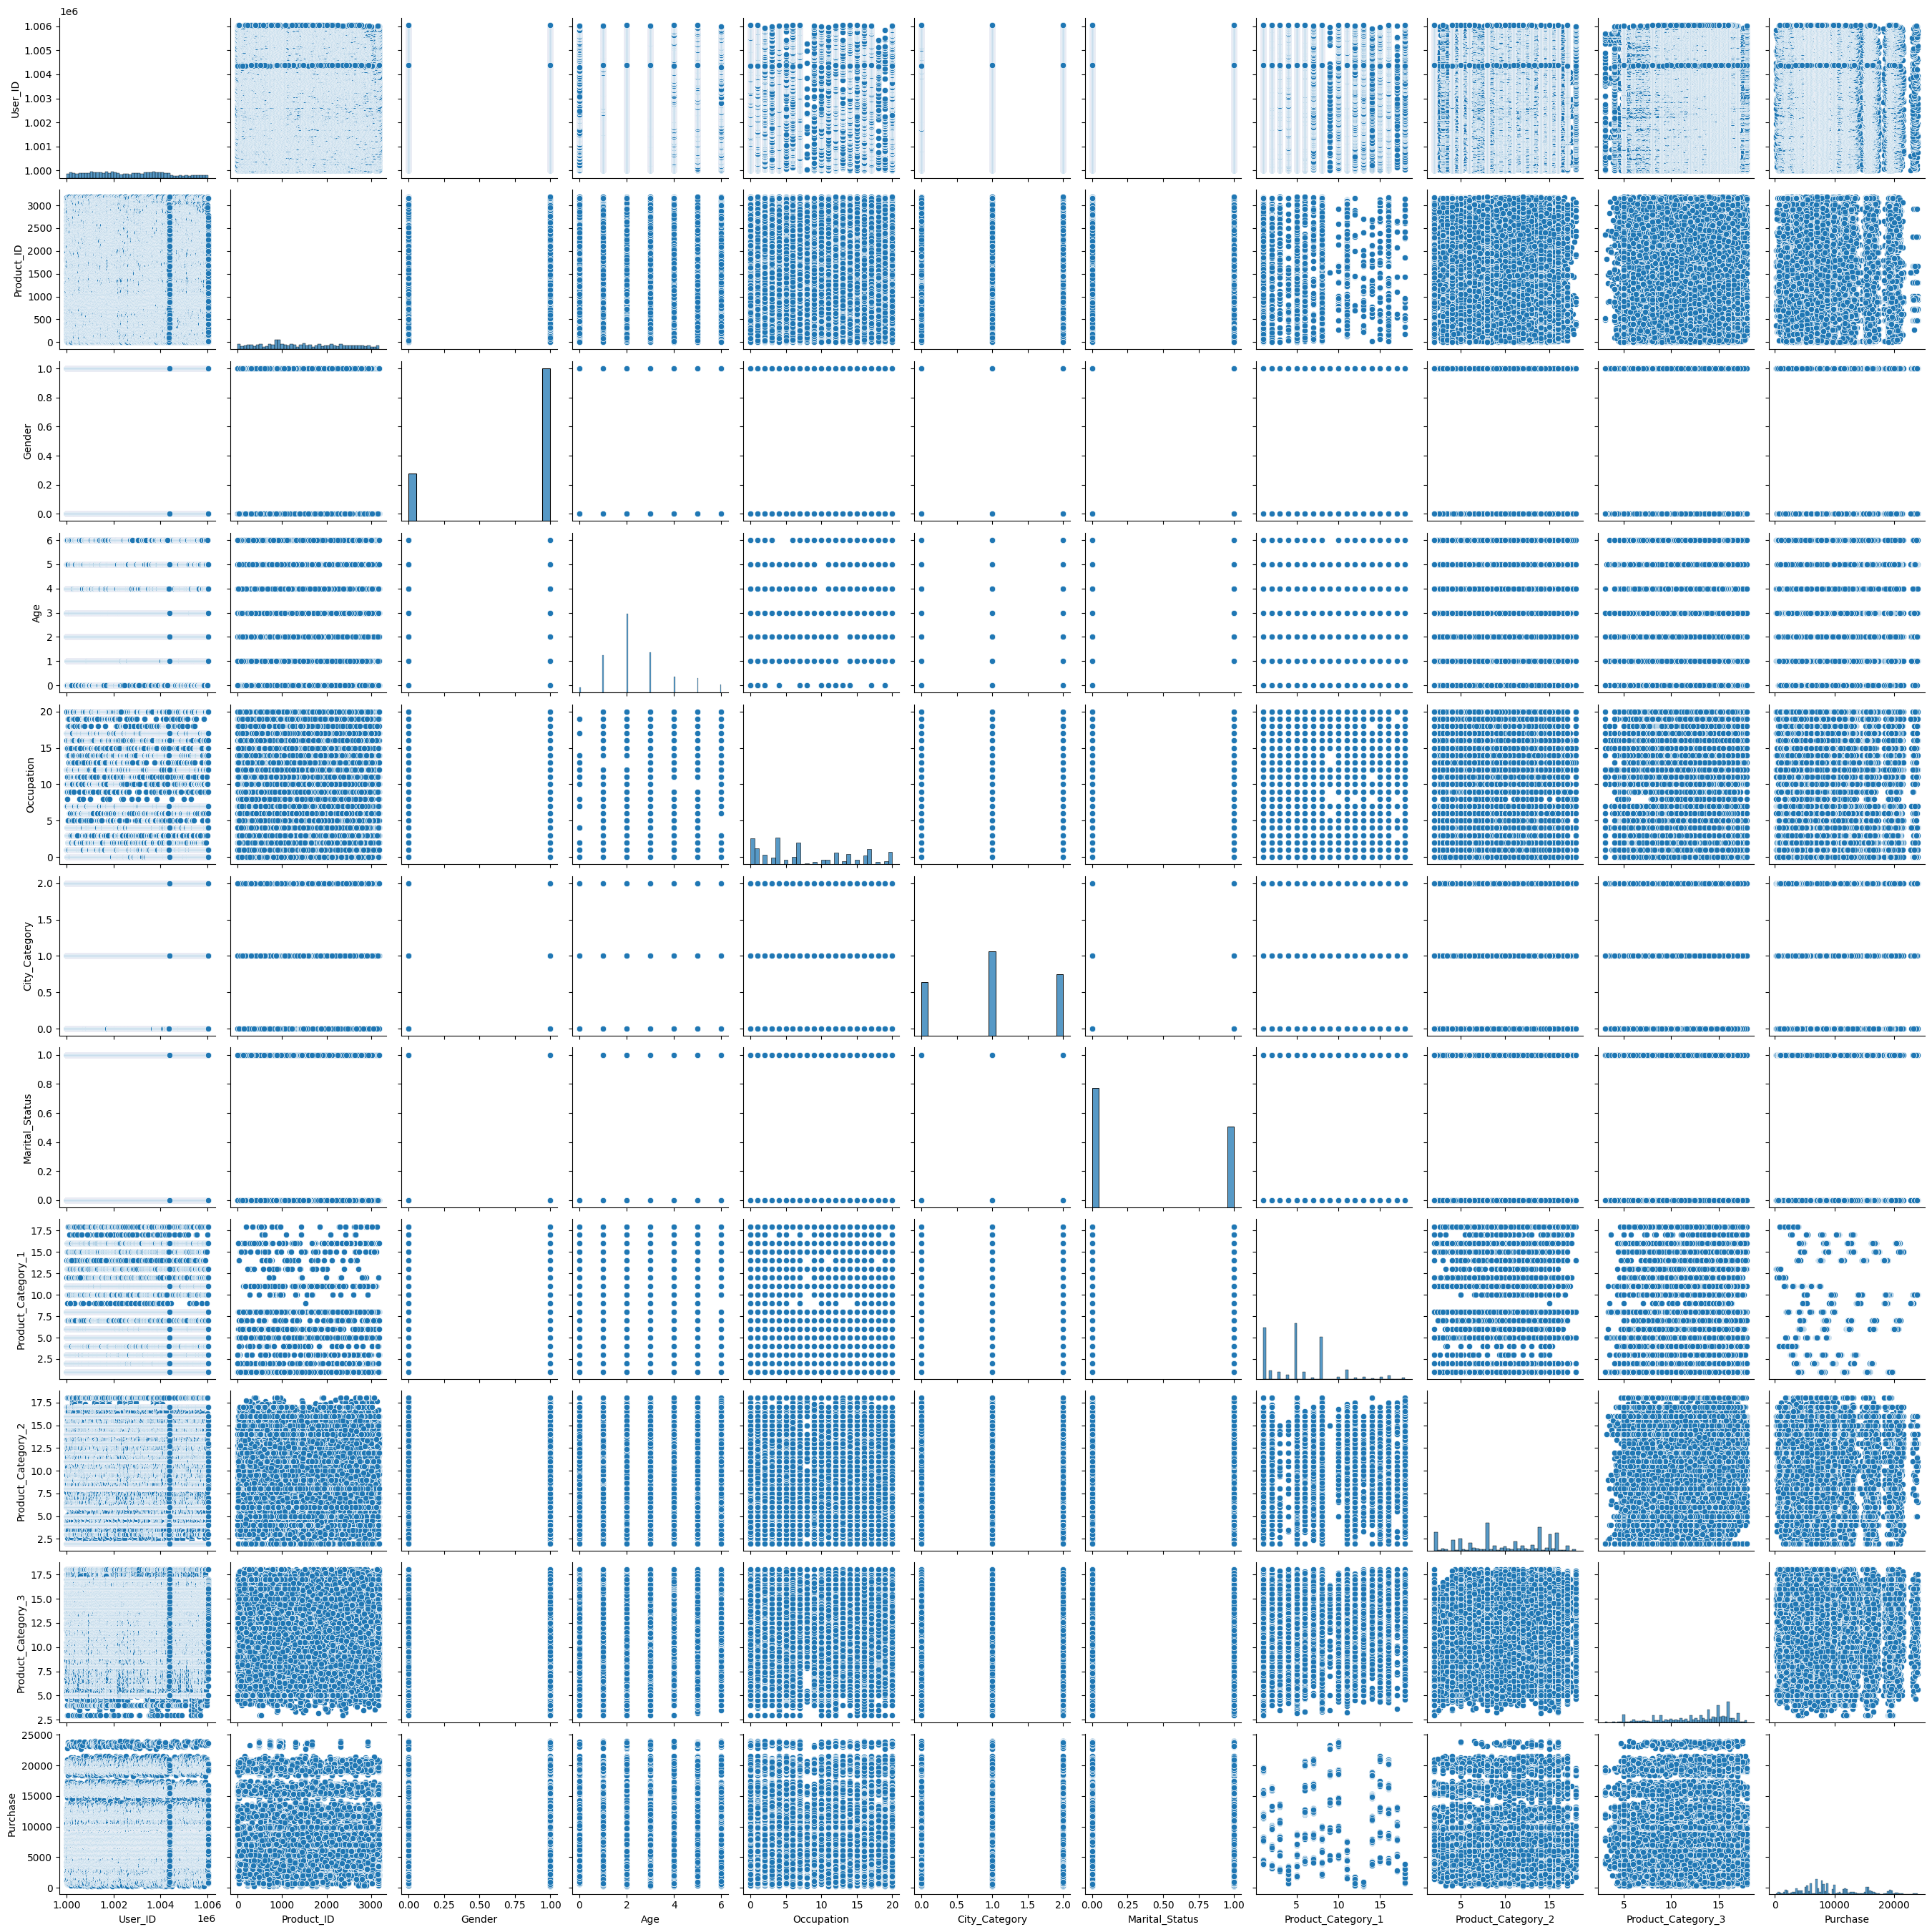

In [97]:
# Creating pairplots using seaborn
sns.pairplot(dataframe)

# Create ML Model for spend prediction

In [ ]:
# Convert Product_ID to numeric
dataframe['Product_ID']= label_encoder.fit_transform(dataframe['Product_ID'])

In [73]:
# Select independent features
X = dataframe[['User_ID','Product_ID','Age','Gender','Occupation','City_Category','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']]

In [68]:
# Select dependent feature
y = dataframe['Purchase']

In [74]:
# Create a Linear Regression Model for Prediction
model = LinearRegression()
model.fit(X,y)

LinearRegression()

# Create test data to test the model

In [93]:
# Read test data and apply same procedures that were applied to train data
test_dataframe = pd.read_csv('test.csv')
test_dataframe = test_dataframe.drop(['Stay_In_Current_City_Years'],axis=1)
test_dataframe = test_dataframe.dropna()

In [94]:
# Apply Label Encoding as applied to train data
test_dataframe['Product_ID']= label_encoder.fit_transform(test_dataframe['Product_ID'])
test_dataframe['Gender']= label_encoder.fit_transform(test_dataframe['Gender'])
test_dataframe['Age']= label_encoder.fit_transform(test_dataframe['Age'])
test_dataframe['City_Category']= label_encoder.fit_transform(test_dataframe['City_Category'])

In [95]:
# Take exact same feature that were taken in training
test_row = test_dataframe[['User_ID','Product_ID','Age','Gender','Occupation','City_Category','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']]
model.predict(test_row)

array([10597.37433536, 12242.27843397, 12229.60837565, ...,
       10353.22048158, 12724.02449817, 11483.75366882])

# Model predicts the purchase of each customer